In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("train__dataset.csv")

In [3]:
df.shape

(18137, 18)

In [4]:
Ncanceled =df['booking_status'].sum()
total=df.shape[0]
Ncanceled/total

0.3276175773281138

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [6]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [8]:
df['type_of_meal_plan'].unique() #need one hot code

array([0, 1, 2, 3], dtype=int64)

In [9]:
one_hot = pd.get_dummies(df['type_of_meal_plan'], prefix='type_of_meal_plan')

# Add the one-hot encoded variables to the original dataframe
df = pd.concat([df, one_hot], axis=1)
df=df.drop(columns=['type_of_meal_plan'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3
0,2,0,1,4,0,0,118,2017,12,28,...,0,0,0,110.80,2,0,1,0,0,0
1,2,1,0,2,0,0,17,2018,4,14,...,0,0,0,145.00,0,1,1,0,0,0
2,1,0,1,5,0,0,349,2018,10,4,...,0,0,0,96.67,0,1,1,0,0,0
3,1,0,2,4,0,0,69,2018,6,12,...,0,0,0,120.00,0,1,1,0,0,0
4,2,0,0,4,0,0,11,2018,1,20,...,0,0,0,69.50,1,0,0,1,0,0


In [10]:
df['room_type_reserved'].unique() #need one hot code

array([0, 1, 4, 3, 2, 5, 6], dtype=int64)

In [11]:
one_hot = pd.get_dummies(df['room_type_reserved'], prefix='room_type_reserved')

# Add the one-hot encoded variables to the original dataframe
df = pd.concat([df, one_hot], axis=1)
df=df.drop(columns=['room_type_reserved'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,...,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6
0,2,0,1,4,0,118,2017,12,28,1,...,0,0,0,1,0,0,0,0,0,0
1,2,1,0,2,0,17,2018,4,14,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,1,...,1,0,0,1,0,0,0,0,0,0


In [12]:
df['market_segment_type'].unique() #need one hot code

array([1, 0, 2, 4, 3], dtype=int64)

In [13]:
one_hot = pd.get_dummies(df['market_segment_type'], prefix='market_segment_type')

# Add the one-hot encoded variables to the original dataframe
df = pd.concat([df, one_hot], axis=1)
df=df.drop(columns=['market_segment_type'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4
0,2,0,1,4,0,118,2017,12,28,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,0,2,0,17,2018,4,14,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,0,0,0,0,0,1,0,0,0


If the 'arrival_year', 'arrival_month', and 'arrival_date' columns are currently of integer type, it may be beneficial to change their data type to category type. This will prevent these columns from affecting the accuracy of the model and will allow for easier manipulation and analysis of the data.

In [14]:
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['arrival_date'] = df['arrival_date'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          18137 non-null  int64   
 1   no_of_children                        18137 non-null  int64   
 2   no_of_weekend_nights                  18137 non-null  int64   
 3   no_of_week_nights                     18137 non-null  int64   
 4   required_car_parking_space            18137 non-null  int64   
 5   lead_time                             18137 non-null  int64   
 6   arrival_year                          18137 non-null  category
 7   arrival_month                         18137 non-null  category
 8   arrival_date                          18137 non-null  category
 9   repeated_guest                        18137 non-null  int64   
 10  no_of_previous_cancellations          18137 non-null  int64   
 11  no

Is there outliers

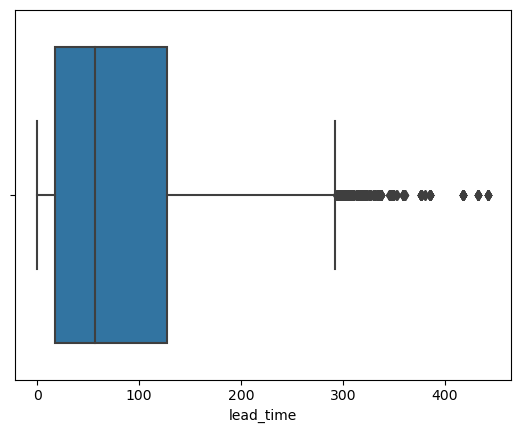

In [15]:
sns.boxplot(x=df["lead_time"])
plt.show()

In [16]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count the number of outliers
num_outliers = ((df['lead_time'] < lower_bound) | (df['lead_time'] > upper_bound)).sum()

# Print the result
print(f"Number of outliers in 'column': {num_outliers}")

Number of outliers in 'column': 616


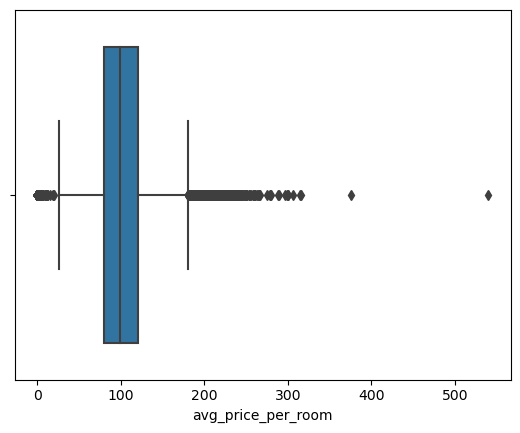

In [17]:
sns.boxplot(x=df["avg_price_per_room"])
plt.show()

In [18]:
Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count the number of outliers
num_outliers = ((df['avg_price_per_room'] < lower_bound) | (df['avg_price_per_room'] > upper_bound)).sum()

# Print the result
print(f"Number of outliers in 'column': {num_outliers}")

Number of outliers in 'column': 873


We can identify outliers in our data by observing the boxplot. However, if there are too many outliers present, it may not be necessary to remove them. In fact, removing outliers could potentially decrease the accuracy of the model.

In [19]:
df['has_children'] = df['no_of_children'].apply(lambda x: 0 if x == 0 else 1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,has_children
0,2,0,1,4,0,118,2017,12,28,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,2,0,17,2018,4,14,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
corr=df.corr()
corr

C:\Users\OMARS\AppData\Local\Temp\ipykernel_8872\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,has_children
no_of_adults,1.000000,-0.017565,0.098241,0.103135,0.010956,0.098254,-0.198334,-0.043494,-0.119703,0.292910,...,0.047932,-0.000200,0.039110,-0.004490,-0.079317,0.239586,-0.287449,-0.084243,-0.077802,0.006840
no_of_children,-0.017565,1.000000,0.026761,0.018957,0.026409,-0.051646,-0.037868,-0.015580,-0.021495,0.342425,...,0.658035,-0.003655,0.111413,-0.003382,-0.134830,0.152744,-0.054578,-0.013825,0.011305,0.919877
no_of_weekend_nights,0.098241,0.026761,1.000000,0.188796,-0.029054,0.047559,-0.058549,-0.015543,-0.018829,-0.005837,...,0.010071,-0.002896,-0.007238,-0.002127,-0.064707,0.118329,-0.101679,0.029429,-0.052607,0.026703
no_of_week_nights,0.103135,0.018957,0.188796,1.000000,-0.054087,0.148348,-0.094936,-0.024761,-0.041108,0.029326,...,0.017726,0.001082,-0.008377,-0.007896,-0.011477,0.078913,-0.120984,0.045379,-0.067845,0.015611
required_car_parking_space,0.010956,0.026409,-0.029054,-0.054087,1.000000,-0.076608,0.116001,0.027336,0.062674,0.062199,...,0.029371,-0.007263,0.012416,-0.002325,-0.098524,0.048045,0.083640,0.002508,0.020409,0.025794
lead_time,0.098254,-0.051646,0.047559,0.148348,-0.076608,1.000000,-0.135079,-0.042747,-0.078664,-0.069985,...,-0.046775,-0.020652,-0.045725,0.001974,0.283984,-0.158837,-0.177320,-0.048843,-0.085810,-0.049509
repeated_guest,-0.198334,-0.037868,-0.058549,-0.094936,0.116001,-0.135079,1.000000,0.378014,0.550633,-0.173846,...,-0.014009,0.016815,0.043749,-0.002063,-0.073439,-0.179713,0.417861,0.031910,0.203681,-0.039183
no_of_previous_cancellations,-0.043494,-0.015580,-0.015543,-0.024761,0.027336,-0.042747,0.378014,1.000000,0.459753,-0.060170,...,-0.007454,-0.001380,0.030413,-0.000780,-0.022204,-0.031303,0.084310,0.002495,0.052415,-0.016769
no_of_previous_bookings_not_canceled,-0.119703,-0.021495,-0.018829,-0.041108,0.062674,-0.078664,0.550633,0.459753,1.000000,-0.114968,...,-0.002637,0.002891,0.031831,-0.001136,-0.052667,-0.108587,0.262548,0.001491,0.145806,-0.022571
avg_price_per_room,0.292910,0.342425,-0.005837,0.029326,0.062199,-0.069985,-0.173846,-0.060170,-0.114968,1.000000,...,0.378916,0.069556,0.081325,-0.012048,-0.214681,0.335114,-0.139311,-0.004208,-0.298660,0.311527


<Axes: >

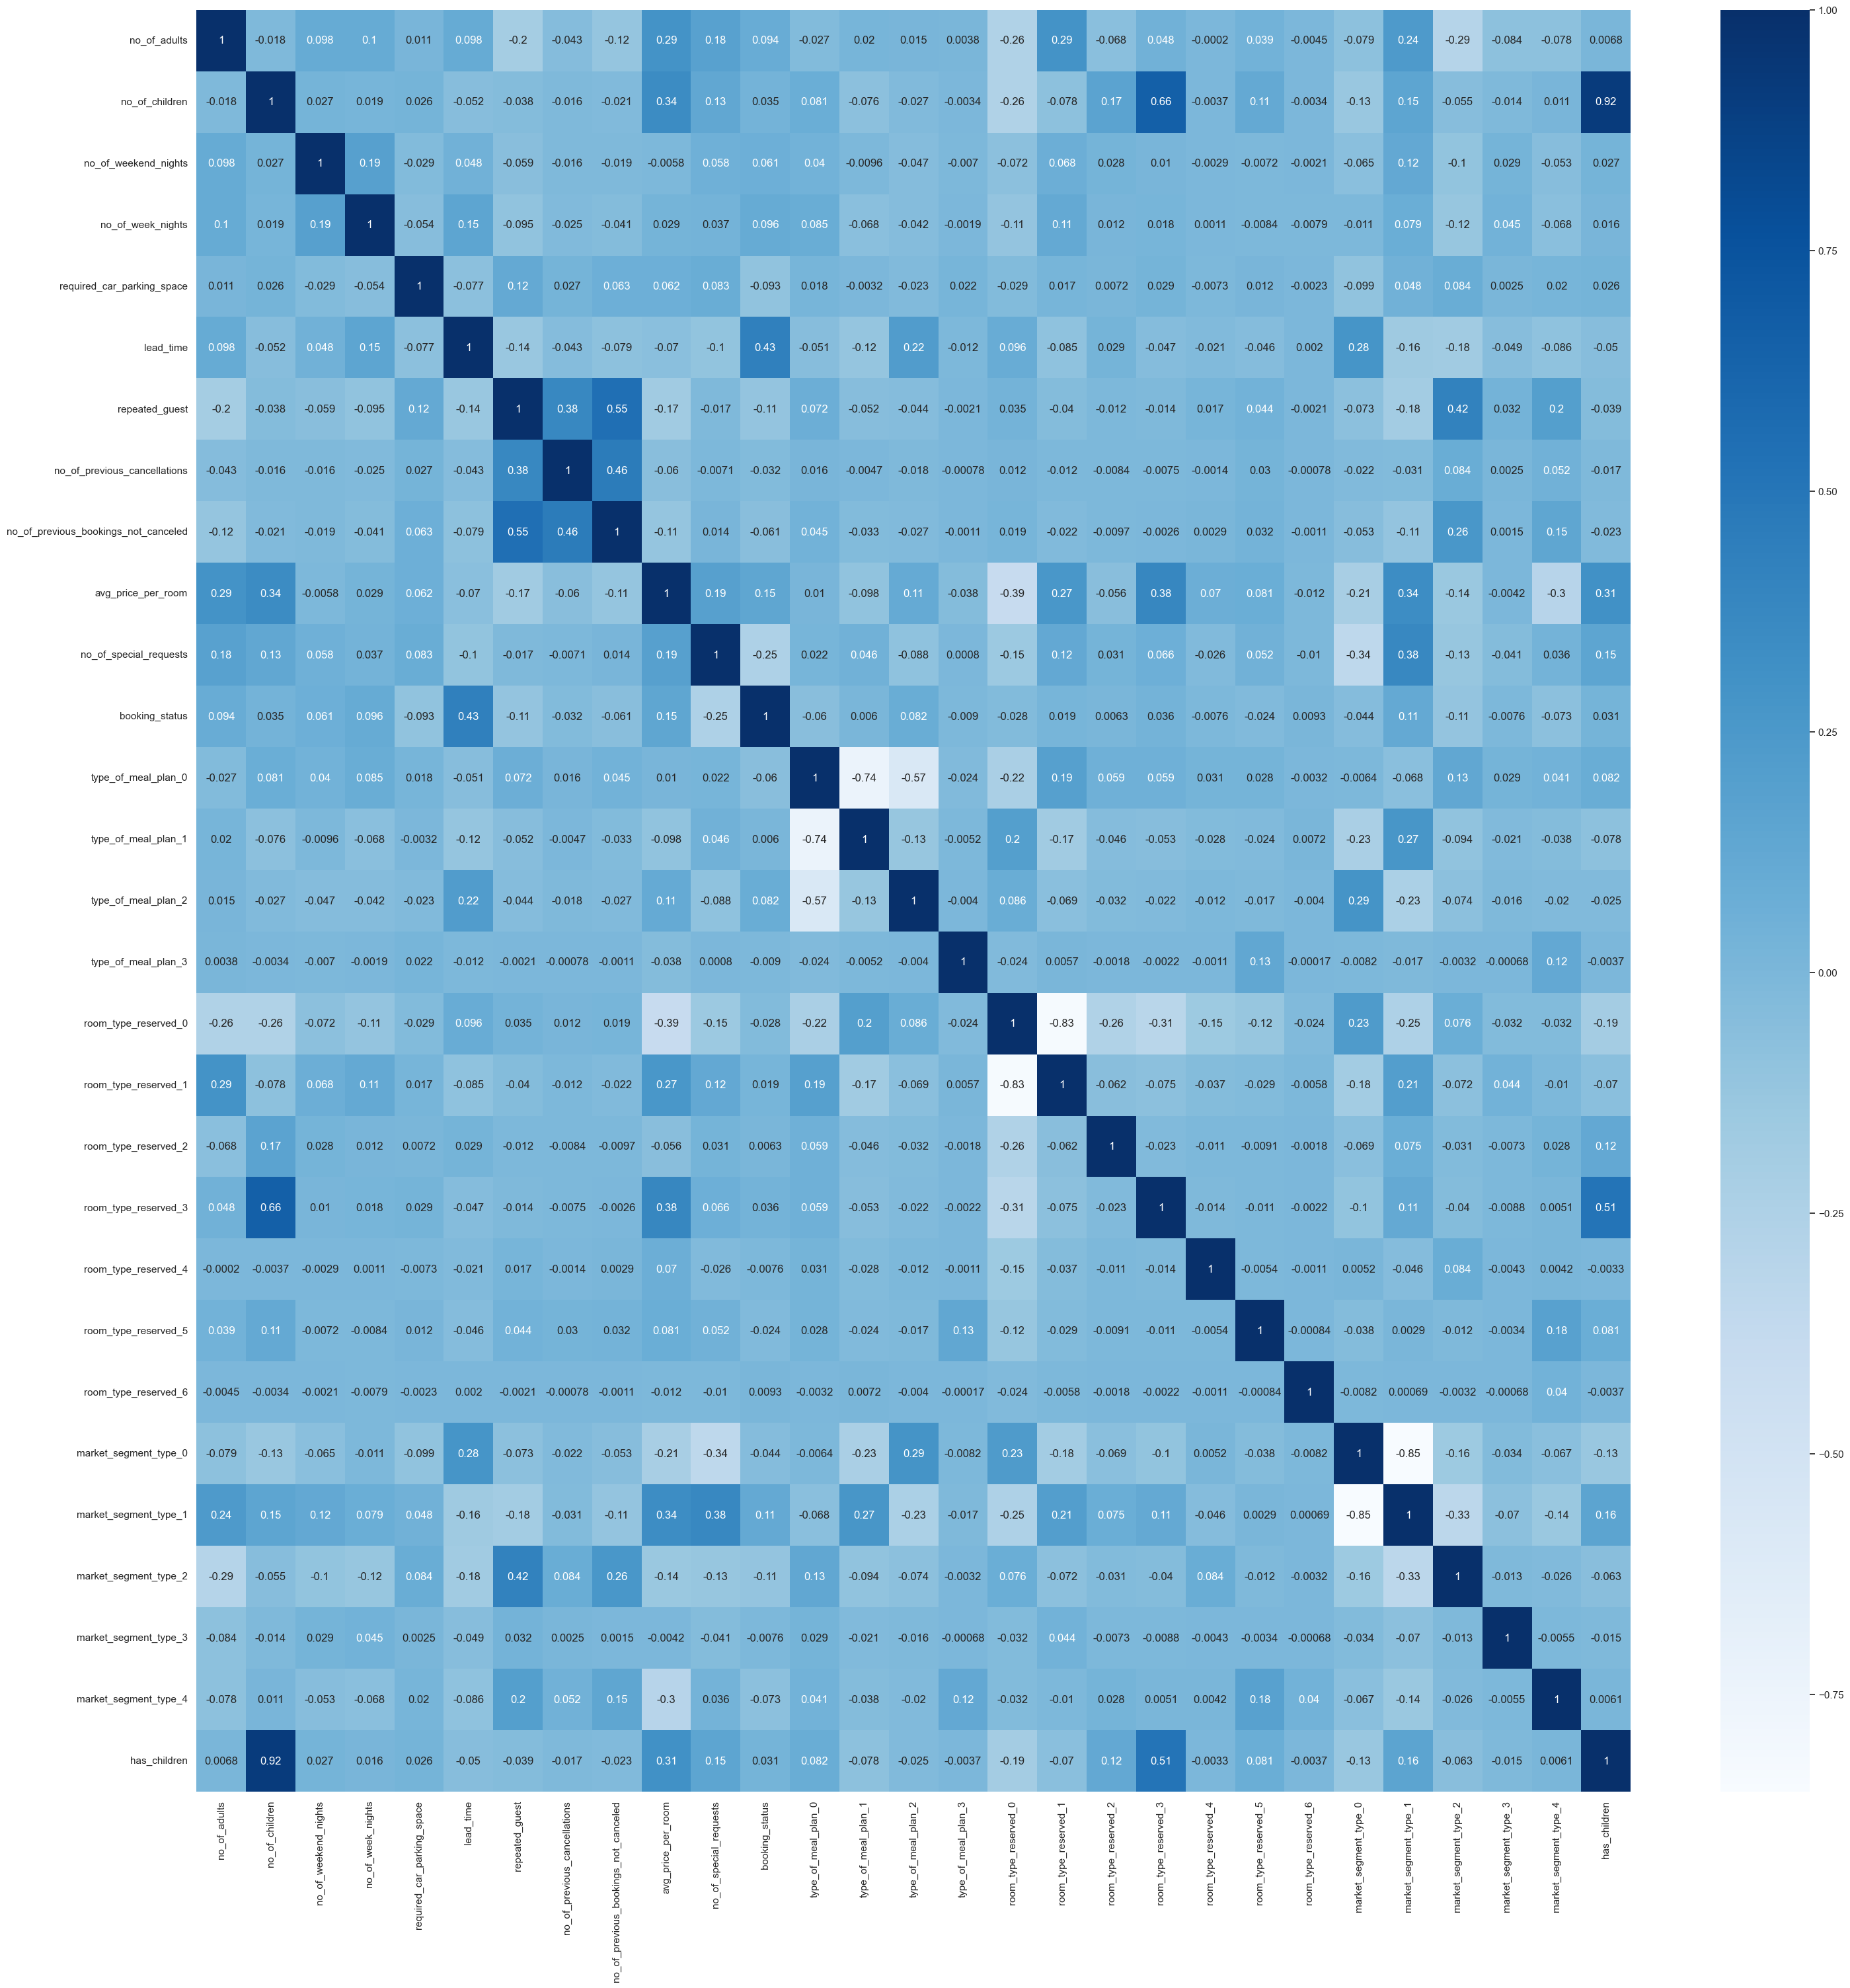

In [21]:
sns.color_palette("tab10")
sns.set(rc={'figure.figsize':(35,35)})
sns.heatmap(corr, annot=True,cmap="Blues",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [23]:
df.to_csv('editing.csv',index=False)